# Credit Card Fraud Detection Project
**Author**: Anurag Balaji  
**Timeline**: Feb 2024 - June 2024  
**Exposure**: Python, Pandas, Matplotlib, Machine Learning, Data Analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

In [4]:
# Load dataset
data = pd.read_csv("creditcard.csv")

Original class distribution:
Class
0    284315
1       492
Name: count, dtype: int64


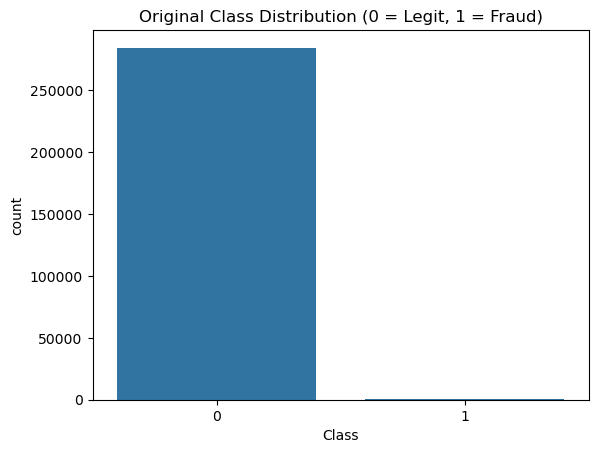

In [5]:
print("Original class distribution:")
print(data['Class'].value_counts())
sns.countplot(x='Class', data=data)
plt.title("Original Class Distribution (0 = Legit, 1 = Fraud)")
plt.show()

In [6]:
# Separate features and target
X = data.drop("Class", axis=1)
y = data["Class"]

In [7]:
# Feature Scaling
scaler = StandardScaler()
X[["Amount", "Time"]] = scaler.fit_transform(X[["Amount", "Time"]])

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
print("Training set class distribution (before SMOTE):")
print(y_train.value_counts())

Training set class distribution (before SMOTE):
Class
0    227451
1       394
Name: count, dtype: int64


In [10]:
# SMOTE Resampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

After SMOTE class distribution:
Class
0    227451
1    227451
Name: count, dtype: int64


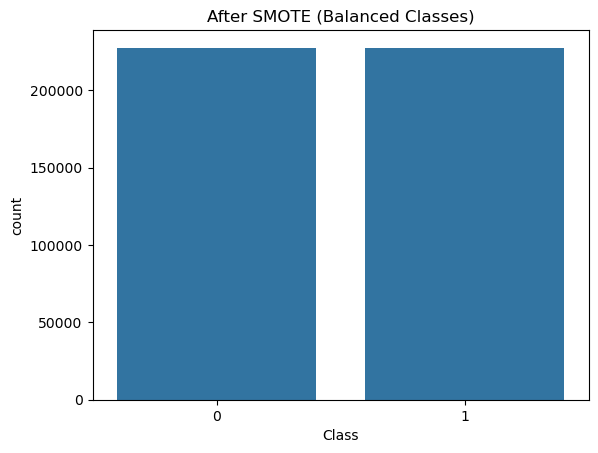

In [11]:
print("After SMOTE class distribution:")
print(y_train_resampled.value_counts())

# Optional: plot
sns.countplot(x=y_train_resampled)
plt.title("After SMOTE (Balanced Classes)")
plt.show()


In [20]:
rf = RandomForestClassifier(random_state=42, n_jobs=1, class_weight='balanced')

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 3]
}

grid = GridSearchCV(rf, param_grid, cv=2, scoring='f1', verbose=1, n_jobs=-1)
grid.fit(X_train_resampled, y_train_resampled)

best_rf = grid.best_estimator_

Fitting 2 folds for each of 12 candidates, totalling 24 fits


In [21]:
# Predictions and Evaluation
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:,1]

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9994382219725431
Precision: 0.8367346938775511
Recall: 0.8367346938775511
F1-Score: 0.8367346938775511
AUC-ROC Score: 0.9740203622247998

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.84      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56848    16]
 [   16    82]]


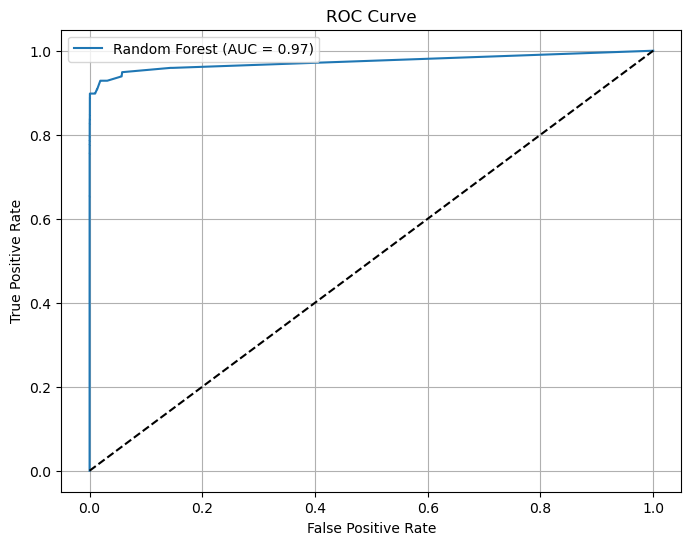

In [22]:
# ROC Curve Plot
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba)))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()